# WORK IN PROGRESS

In a previous notebook, I crawled (slightly clumsily) some property data.  Here I started cleaning the data only to discover that the price information looks off and that there are very few features associated with these records that would be useful for analysis.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import os
import pandas as pd
import pickle
import json

In [2]:
# LOAD ALL THE DATA I PREVIOUSLY CRAWLED
ddir = 'data/'
dirs = os.listdir(ddir)
data = {}
for d in dirs:
    files = os.listdir(ddir + d)
    for file in files:
        i = file.index('.pkl')
        if i > 0:
            ain = int(file[(4):(len(file)-4)])
            dd = pickle.load(open(ddir + d + '/' + file, 'r'))
            data[ain] = json.loads(dd.text)

In [3]:
# EXTRACT THE RECORDS THAT ARE PROPERTIES, IGNORE THE ERROR REPORTS OR MISSING RECORDS
details = []
for k in data.keys():
    v = data[k]
    det = v['results']['ParcelDetails']
    if det is not None:
        details.append(det)

In [4]:
# CONVERTING TO DATA FRAME
df = pd.DataFrame(details)

def clean_price(x):
    if x == '':
        return -1
    return float(x.replace('$', '').replace(',', ''))

dropable = ['REGION_LABEL', 'REGION', 'UseType', 'Assr_Map', 'Assr_Index_Map', 'ParcelType']
for d in dropable:
    df.drop(d, axis=1, inplace=True)

dollar_fields = ['PPVALUE', 'SalePrice', 'FIXEVEV', 'FIXTVAL', 'HOEVAL', 'LANDVAL', 'PPEXEVAL', 'REEXEVAL', 'IMPROVAL']
for field in dollar_fields:
    df[field] = df[field].apply(clean_price)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  app.launch_new_instance()


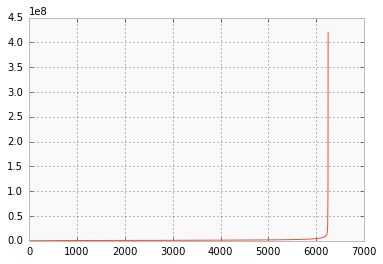

In [45]:
sp = df['SalePrice'].copy()
sp = sp[sp>0]
sp.sort(inplace=True)
plt.plot(sp.tolist())

In [41]:
1.0 * sum(df['SalePrice'] > 0) / df.shape[0]

0.06944552453534489

In [8]:
df.columns

Index([u'AIN', u'Address1', u'Address2', u'CLUSTER', u'FIXEVEV', u'FIXTVAL',
       u'FormattedAIN', u'HOEVAL', u'IMPROVAL', u'Improvements',
       u'IsParcelsDisplay', u'LANDVAL', u'Legals', u'PPEXEVAL', u'PPVALUE',
       u'RECDATE', u'REEXEVAL', u'SaleDate', u'SalePrice', u'TRA',
       u'UseType_Label'],
      dtype='object')

In [21]:
cols = ['CLUSTER', 'HOEVAL', 'IMPROVAL', 'FIXEVEV', 'FIXTVAL', 'IsParcelsDisplay', 'LANDVAL', 'PPEXEVAL', 'PPVALUE', 'REEXEVAL', 'SalePrice']

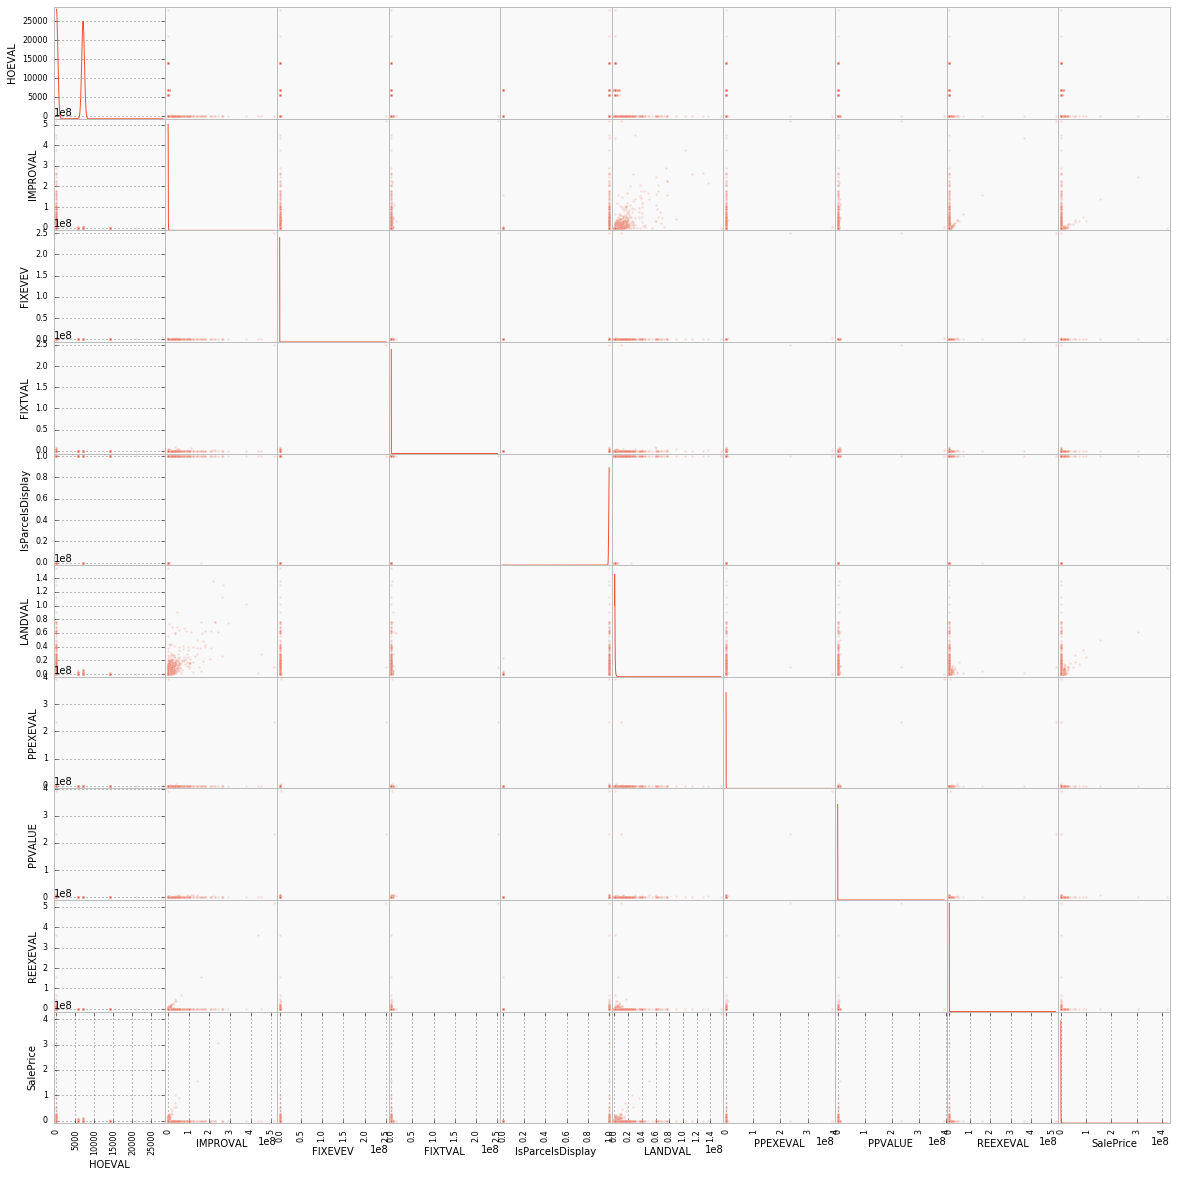

In [23]:
scatter_matrix(df[cols], alpha=0.2, figsize=(20, 20), diagonal='kde')
plt.show()

In [141]:
df.columns

Index([             u'AIN',         u'Address1',         u'Address2',
                u'CLUSTER',          u'FIXEVEV',          u'FIXTVAL',
           u'FormattedAIN',           u'HOEVAL',         u'IMPROVAL',
           u'Improvements', u'IsParcelsDisplay',          u'LANDVAL',
                 u'Legals',         u'PPEXEVAL',          u'PPVALUE',
                u'RECDATE',         u'REEXEVAL',         u'SaleDate',
              u'SalePrice',              u'TRA',    u'UseType_Label',
             u'sale_month',         u'sale_day',        u'sale_year'],
      dtype='object')

In [146]:
df.head()

,AIN,Address1,Address2,CLUSTER,FIXEVEV,FIXTVAL,FormattedAIN,HOEVAL,IMPROVAL,Improvements,...,PPVALUE,RECDATE,REEXEVAL,SaleDate,SalePrice,TRA,UseType_Label,sale_month,sale_day,sale_year
0,4250004008,3288 GRANVILLE AVE,LOS ANGELES CA 90066,07123,0,0,4250-004-008,7000,148325,"[{u'BDLSQMAIN': u'2,352', u'BDLYRBLT': u'1947'...",...,0,04/26/2010,0,,-1,00067,Single Family Residential,0,0,0
1,4258005001,2606 COOLIDGE AVE,LOS ANGELES CA 90064,07123,0,0,4258-005-001,0,92241,"[{u'BDLSQMAIN': u'1,290', u'BDLYRBLT': u'1942'...",...,0,06/24/2004,0,,-1,00067,Single Family Residential,0,0,0
2,4258005002,2610 COOLIDGE AVE,LOS ANGELES CA 90064,07123,0,0,4258-005-002,0,49575,"[{u'BDLSQMAIN': u'1,450', u'BDLYRBLT': u'1951'...",...,0,01/23/2008,0,,-1,00067,Single Family Residential,0,0,0
3,4258005003,2616 COOLIDGE AVE,LOS ANGELES CA 90064,07123,0,0,4258-005-003,7000,30917,"[{u'BDLSQMAIN': u'1,256', u'BDLYRBLT': u'1939'...",...,0,01/25/1996,0,,-1,00067,Single Family Residential,0,0,0
4,4258005004,2620 COOLIDGE AVE,LOS ANGELES CA 90064,07123,0,0,4258-005-004,0,153706,"[{u'BDLSQMAIN': u'1,652', u'BDLYRBLT': u'1937'...",...,0,10/08/2009,0,,-1,00067,Single Family Residential,0,0,0


In [121]:
df.to_csv('ain_data.csv', set='\t', index=False)